In [671]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [672]:
data = pd.read_csv('Jamboree_Admission.csv')

In [673]:
print(f" data shape {data.shape}")

 data shape (500, 9)


Problem statement 

* Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
* They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

### Columns info 
* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

In [674]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [675]:
data['Serial No.'].nunique()

500

In [676]:
data.drop( columns ='Serial No.'  , inplace= True)

No missing value 

/Users/aditya/miniconda3/envs/pytorch/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


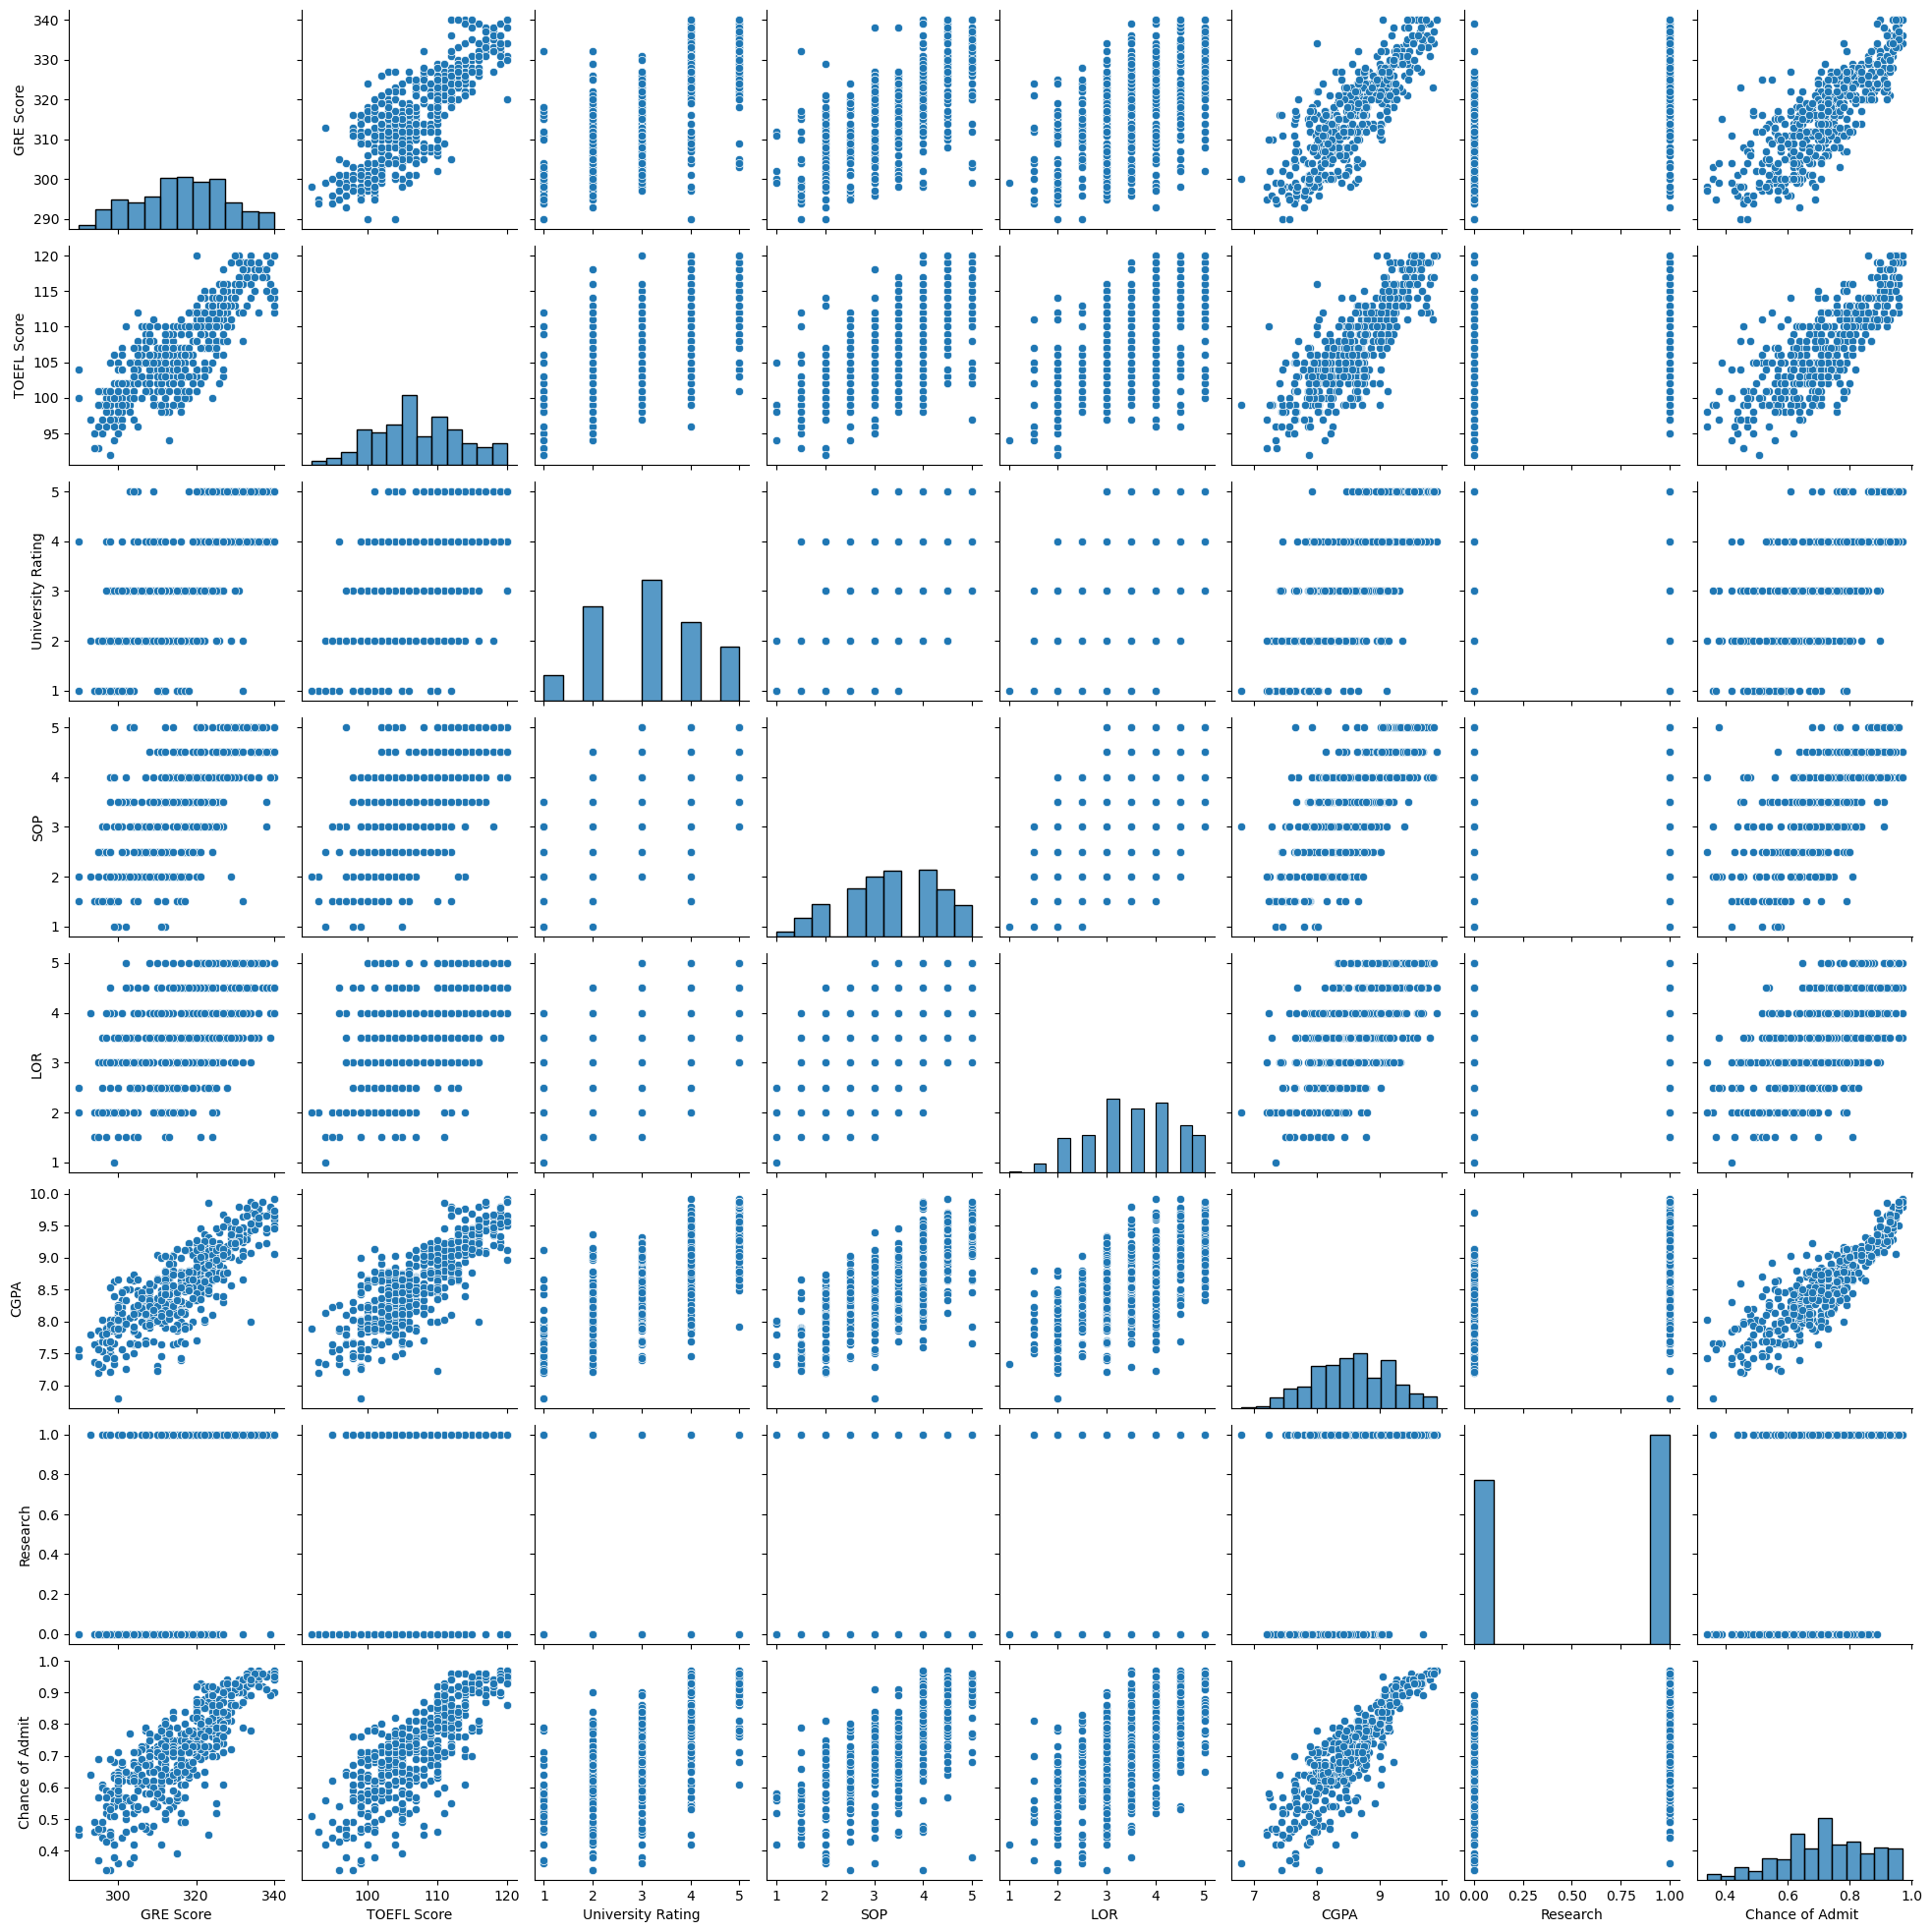

In [677]:
sns.pairplot(data)

1. All the features are +ve corr with target 

In [678]:
data.duplicated().sum()

0

### no duplicate

* All serial no is unique -- this wont carry much importance when used for modeling 

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


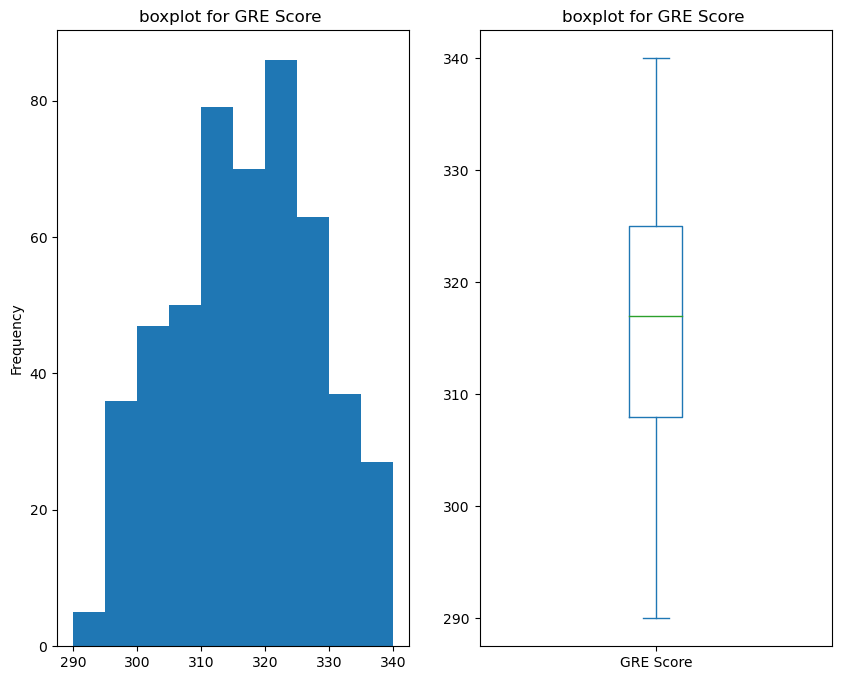

mean      316.472000
median    317.000000
std        11.295148
min       290.000000
max       340.000000
Name: GRE Score, dtype: float64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


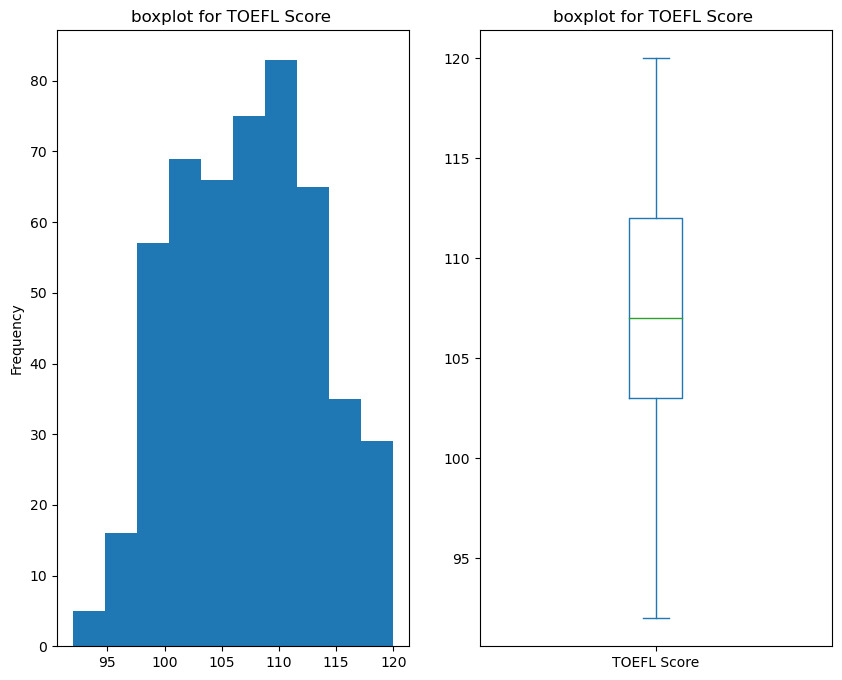

mean      107.192000
median    107.000000
std         6.081868
min        92.000000
max       120.000000
Name: TOEFL Score, dtype: float64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


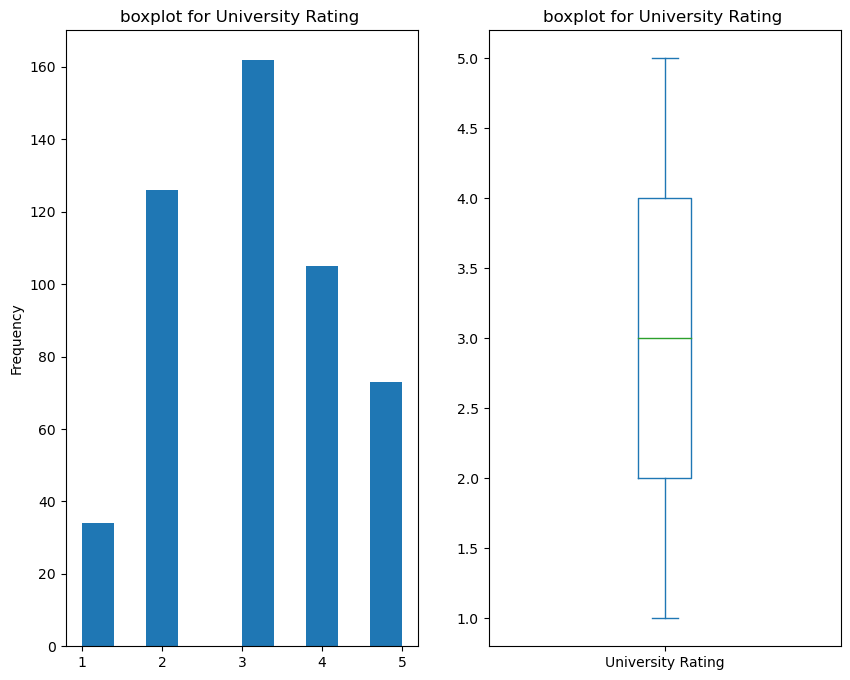

mean      3.114000
median    3.000000
std       1.143512
min       1.000000
max       5.000000
Name: University Rating, dtype: float64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


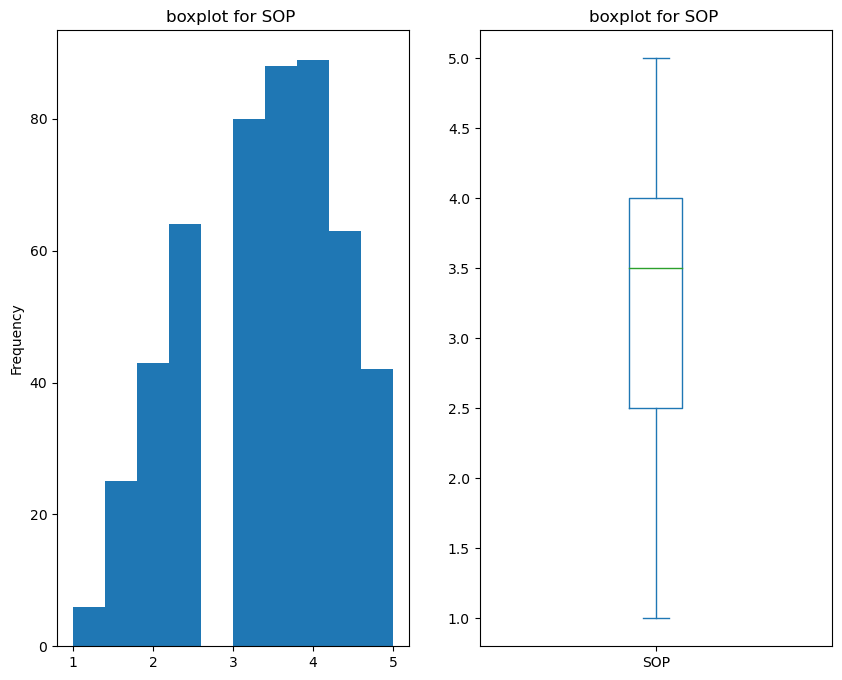

mean      3.374000
median    3.500000
std       0.991004
min       1.000000
max       5.000000
Name: SOP, dtype: float64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


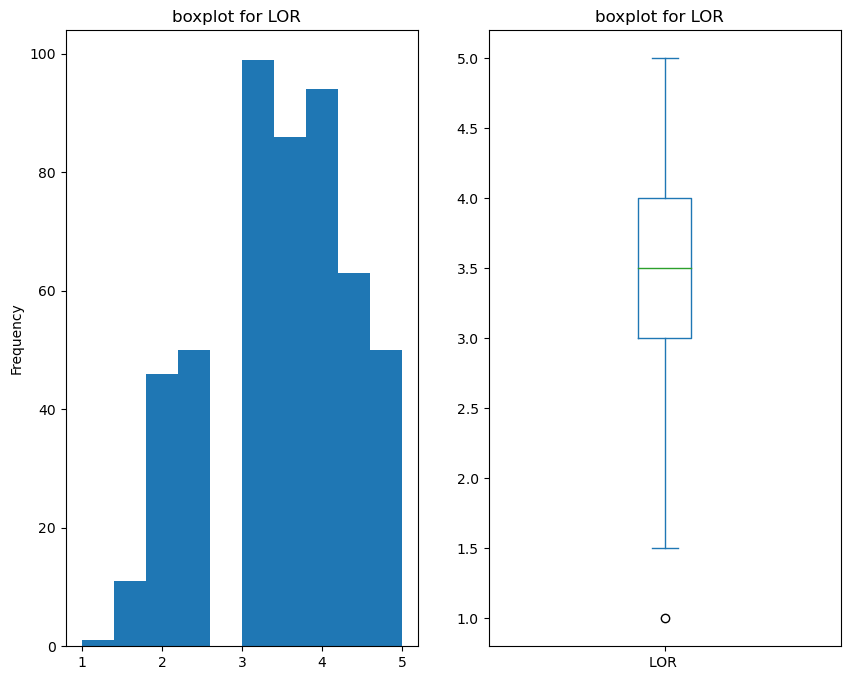

mean      3.48400
median    3.50000
std       0.92545
min       1.00000
max       5.00000
Name: LOR , dtype: float64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


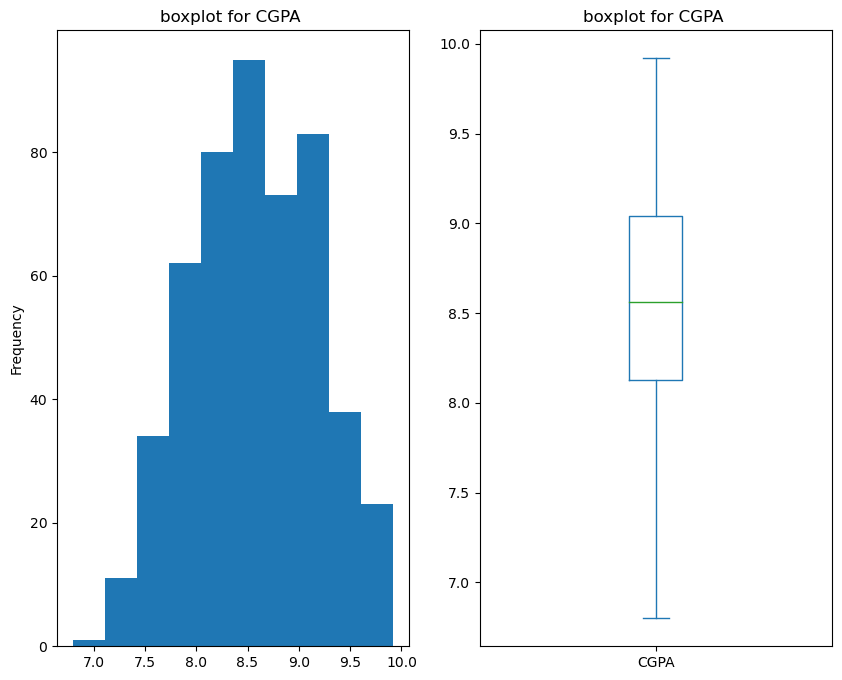

mean      8.576440
median    8.560000
std       0.604813
min       6.800000
max       9.920000
Name: CGPA, dtype: float64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


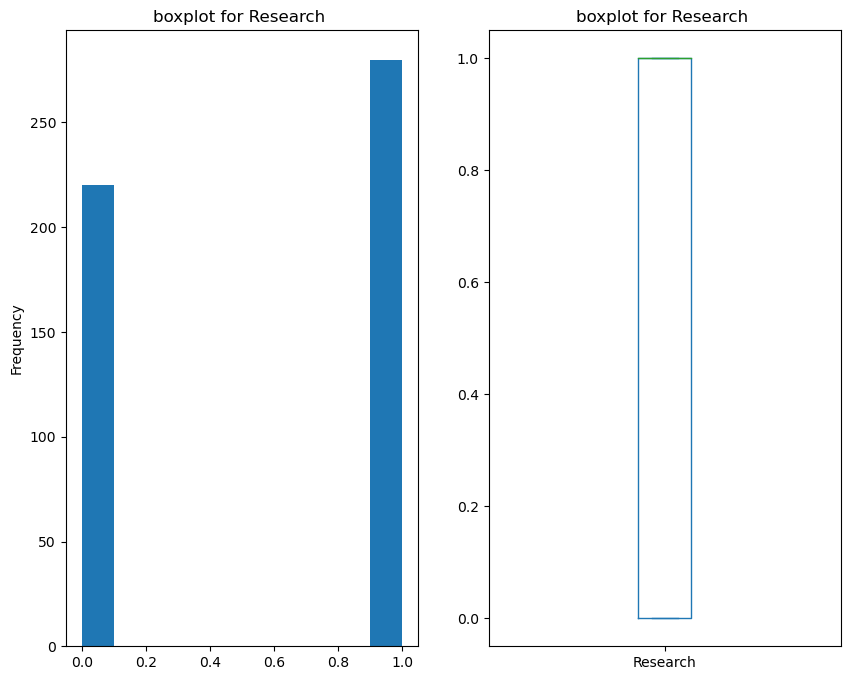

mean      0.560000
median    1.000000
std       0.496884
min       0.000000
max       1.000000
Name: Research, dtype: float64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


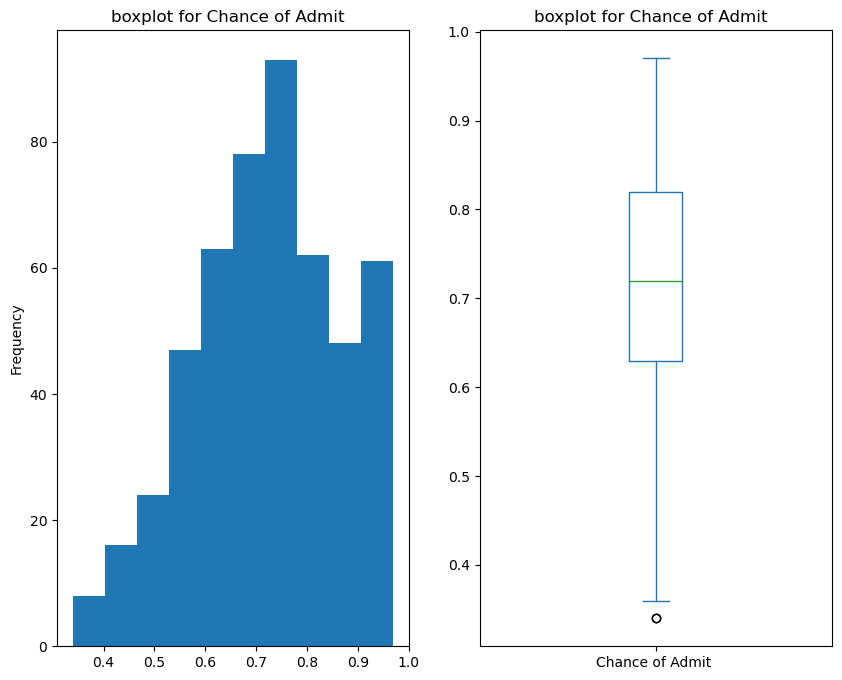

mean      0.72174
median    0.72000
std       0.14114
min       0.34000
max       0.97000
Name: Chance of Admit , dtype: float64


In [679]:
cols = [ 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

for c in cols:
    print("$"* 50)
    fig , ax =plt.subplots(1,2 , figsize =(10 ,8))
    data[c].plot(kind='hist' , ax= ax[0] )
    ax[0].set_title(f"boxplot for {c} ")
    data[c].plot(kind='box', ax= ax[1] )
    ax[1].set_title(f"boxplot for {c} ")
    plt.show()
    print( data[c].agg(['mean'  , 'median'  , 'std' ,'min' ,'max'] ).T)



    

1. Gre is outof 340 -- mean/median are  [316 , 317 ] min/max [290 - 340]  
2. tofl is outof 120 -- mean/median are  [107 , 107 ] min/max [92 - 120]
3. University Rating out of 5   mean/median [3,3] min/max [1 ,5]
4. Sop is out of 5  mean/median [3.2 , 3.7]  min/max [1 ,5]
5. LOr is out of  5 mean/median [3.5 , 3.5]  min/max [1 ,5]
6. CGPA is out of  10 mean/median [8.5, 8.5]  min/max [6.8 ,9,92]
7. 56 % for people have done research 
8. Mean and median chance of admit is 72 %
9. Lor has some `outliers`
 

# removing outlier in lor 

In [680]:
Q1 = data['LOR '].quantile(0.25)
Q3 = data['LOR '].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['LOR '] >= upper)[0]
lower_array = np.where(data['LOR '] <= lower)[0]
 
# # # Removing the outliers
data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

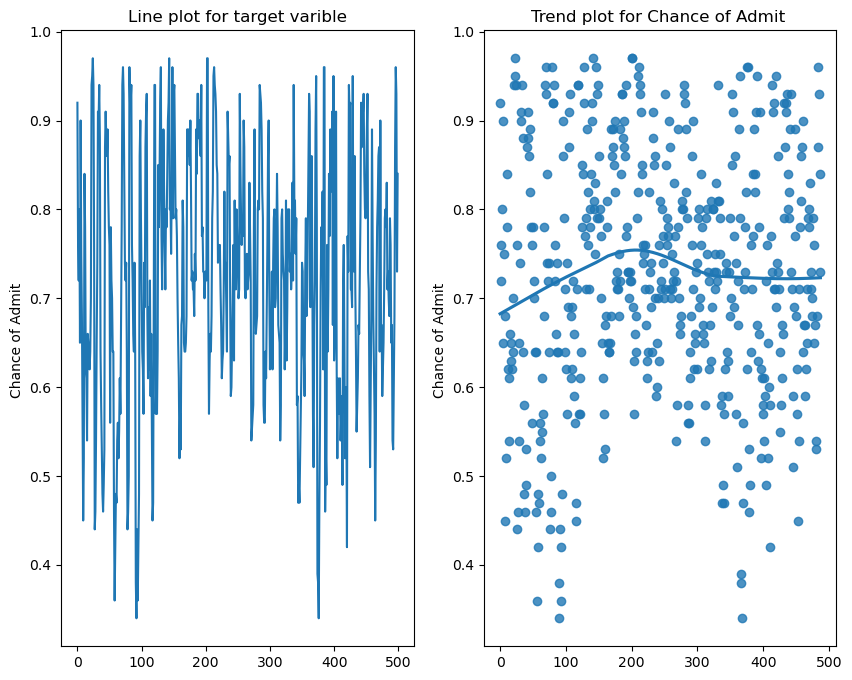

In [681]:
fig , axis  = plt.subplots(1,2 , figsize=(10 ,8) )
sns.lineplot( data['Chance of Admit ']  , ax = axis[0])
axis[0].set_title("Line plot for target varible")

sns.regplot(data , y ='Chance of Admit ', x = list(range(data.shape[0]))   , lowess=True , ax=axis[1])
axis[1].set_title("Trend plot for Chance of Admit ")
plt.show()

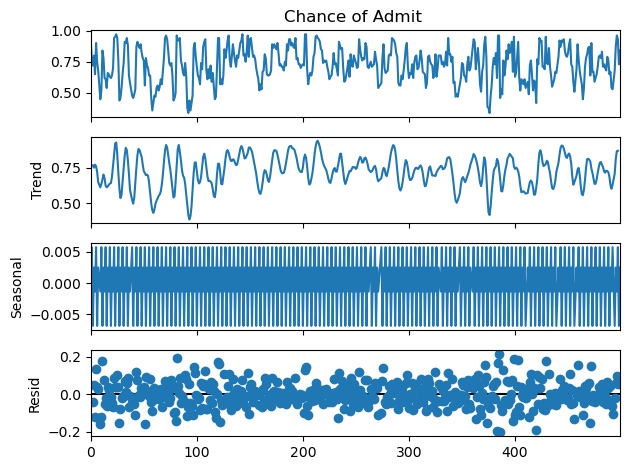

In [682]:
results=seasonal_decompose(data['Chance of Admit '] , period =4)
results.plot()
plt.show()

1. Trend dont seems to be linear 
2. Data seem to have seasonal components 

In [683]:
x_cols =['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research']
y_col = ['Chance of Admit ']

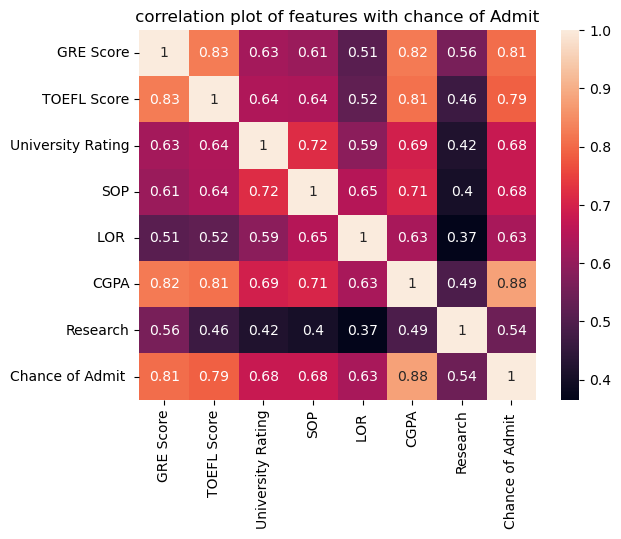

In [684]:
sns.heatmap( data [cols].corr()   , annot= True)
plt.title(" correlation plot of features with chance of Admit ")
plt.show()

1. Allmost all feature is +ve correlated with change of Admit , highest correlation is with cgpa and min with research 
2. Gre is highly corr with tofl and cgpa  -- people who have performed good in Gre in general perform well in tofl and cgpa 
3. university rating is highly corr with sop and cgpa least with research so if u have high rating in Sop u have good chance to get in highly rated university 

# Base model

In [685]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler  

# mean incoding 

80% - 20% split

In [686]:
X = data[x_cols]
y =data [y_col]
X_train, X_test, y_train, y_test =train_test_split(X, y , test_size=0.2, random_state= 0)

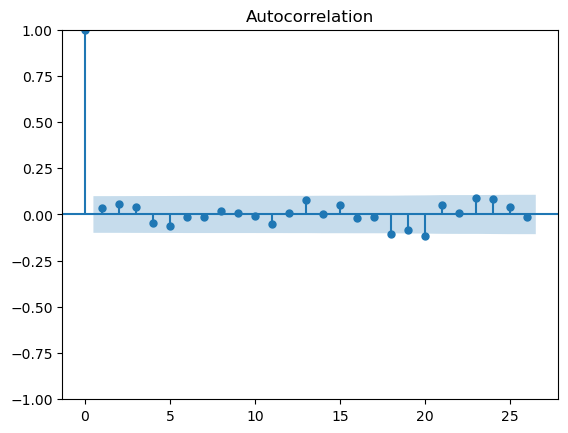

In [687]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y_train)
plt.show()

Traget dont seem to be autocorrelated 

In [688]:
import statsmodels.api as sm

# normalizing data

In [689]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train_std=pd.DataFrame(X_train_std  , columns= X_train.columns)
X_test_std = scaler.transform(X_test)
X_test_std=pd.DataFrame(X_test_std  , columns= X_train.columns)

In [690]:
X_train_sm = sm.add_constant(X_train_std)
X_test_sm = sm.add_constant(X_test_std)
model = sm.OLS(y_train['Chance of Admit '].values, X_train_sm) 
results = model.fit()
# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     254.6
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          1.29e-139
Time:                        19:32:29   Log-Likelihood:                 556.29
No. Observations:                 390   AIC:                            -1097.
Df Residuals:                     382   BIC:                            -1065.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7299      0.00

1. r2 is 83% and Adj r2 is 82%  --- many features are correlated this can be observed in spread is 95% confidence interval.

2. At 5% alpha University Rating  and  SOP seem to be not significant 
3. SOP and University rating is not significant to model

# Prediction

In [691]:
from sklearn.metrics import mean_squared_error , r2_score
y_train_prediction =results.predict(X_train_sm)
y_test_prediction =results.predict(X_test_sm)
y_train['residual'] = y_train['Chance of Admit ']  -y_train_prediction
y_train['prediction'] =y_train_prediction


Model performace

 train residual mean :0.003689350666036758


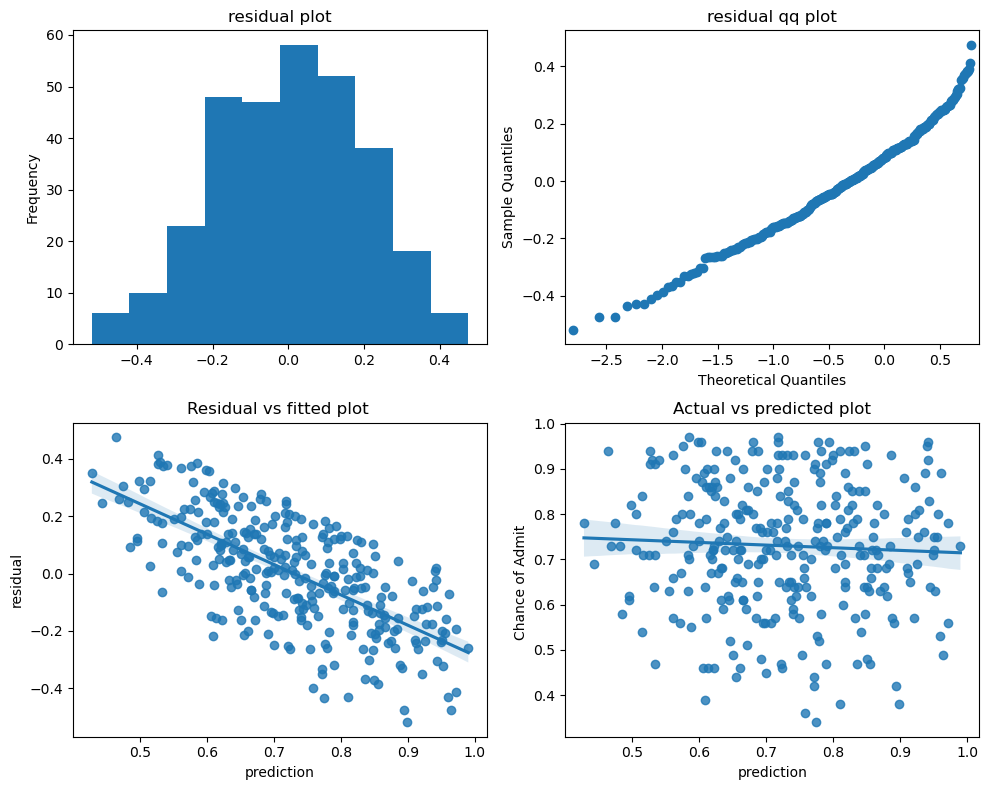

In [692]:
def plot_diagnostic(y_train):

    print(f" train residual mean :{y_train['residual'].mean()  }")
    fig , axis =plt.subplots(2,2 ,  figsize =(10 ,8) )
    y_train['residual'].plot( kind ='hist' , ax =axis[0 ,0])
    axis[0 ,0].set_title("residual plot")



    sm.qqplot(y_train['residual'],  ax = axis[0,1]) 
    axis[0 ,1].set_title("residual qq plot")


    sns.regplot(y_train , y ='residual', x = 'prediction' ,  ax = axis[1,0])
    axis[1 ,0].set_title("Residual vs fitted plot ")


    sns.regplot(y_train , y ='Chance of Admit ', x = 'prediction' ,  ax = axis[1,1])
    axis[1 ,1].set_title("Actual vs predicted plot")
    plt.tight_layout()


plot_diagnostic(y_train) 

1. residual is almost near to zero
2. Residual is almost normal 
3. There seems to be some spread in  variance in residual vs fitted plot    not that  severe
4. model seem to do overprediction based on left tail in residual histogram but not by a lot

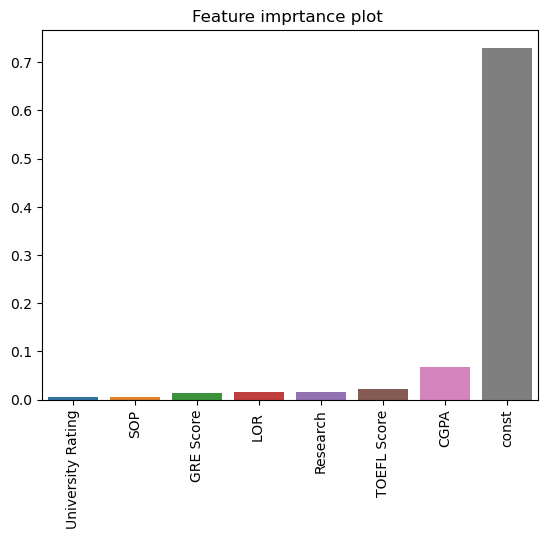

In [693]:
feature_imp = pd.DataFrame(results.params)
feature_imp[0]=feature_imp[0].apply(lambda x : abs(x))
feature_imp =feature_imp.sort_values(by =0)
sns.barplot(x=feature_imp.index , y=feature_imp[0].values)
plt.xticks(rotation=90)
plt.title("Feature imprtance plot ")
plt.show()

1. CGPA is most important followed by  GRE score 

In [694]:
def get_metric( y_org_train , y_pred_train  , y_org_test , y_pred_test , d)   :
    mse =mean_squared_error(y_org_train , y_pred_train)
    rmse =mean_squared_error(y_org_train , y_pred_train ,squared =False)
    r2 =r2_score(y_org_train , y_pred_train )
    adjr2 =lambda  R2 , n , d :1-(1-R2)*(n-1)/(n-d-1)
    print(f"train mse :{mse:.3f}  rmse : {rmse :.3f}  r2 {r2:.3f}  adjr2 : { adjr2(r2 , len(y_org_train)  ,d) :.3f}")
    mse =mean_squared_error(y_org_test , y_pred_test)
    rmse =mean_squared_error(y_org_test , y_pred_test ,squared =False)
    r2 =r2_score(y_org_test , y_pred_test )
    print(f"test mse :{mse:.3f}  rmse : {rmse :.3f}  r2 {r2:.3f}    adjr2 : { adjr2(r2 , len(y_org_test)  ,d) :.3f}")
    
get_metric(y_train['Chance of Admit ']  ,  y_train_prediction    , y_test['Chance of Admit ']  , y_test_prediction , d =  X_train_sm.shape[1]-1)

train mse :0.003  rmse : 0.058  r2 0.824  adjr2 : 0.820
test mse :0.004  rmse : 0.065  r2 0.782    adjr2 : 0.765


1. both mse and rmse for train is test is very small 
2. test mse and rmse is slighly more then test and r2 is less by 4-5 %

In [695]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(X_train_std)

,variables,VIF
0,GRE Score,4.220261
1,TOEFL Score,3.898448
2,University Rating,2.413696
3,SOP,2.750533
4,LOR,1.965577
5,CGPA,4.907625
6,Research,1.530512


1. Vif of Gre and cgpa seems high 
2. None of features seems to highly Multicorrelated 
3. GRE Score and CGPA are near to 5 
4. Not droping any feature as  Multicorrelation is not very major

# feature engineer 

In [696]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
456,299,100,2,2.0,2.0,7.88,0
467,318,101,5,3.5,5.0,8.78,1
393,317,104,2,3.0,3.0,8.76,0
368,298,92,1,2.0,2.0,7.88,0
223,308,109,2,3.0,4.0,8.45,0


In [697]:
drop_list =[  'CGPA_h_l'  ,  'GRE_h_l'    ,'score_std'  ,  'score_mean'  ,  'score_max'  ,'score_min'  ,'CGPA_ratio'   ,'GRE Score_ratio'  ,'TOEFL Score_ratio'  ,'score_ratio_std']

In [698]:
X_train['CGPA_h_l']  =X_train['CGPA'].apply( lambda x  : 1 if x >= X_train['CGPA'].mean() else 0 )
X_test['CGPA_h_l']  =X_test['CGPA'].apply( lambda x  : 1 if x >= X_train['CGPA'].mean() else 0 )

X_train['GRE_h_l']  =X_train['GRE Score'].apply( lambda x  : 1 if x >= X_train['GRE Score'].mean() else 0 )
X_test['GRE_h_l']  =X_test['GRE Score'].apply( lambda x  : 1 if x >= X_train['GRE Score'].mean() else 0 )

X_train['score_std']  =X_train[['GRE Score' ,'TOEFL Score' ,'CGPA']].std( axis=1)
X_test['score_std']  =X_test[['GRE Score' ,'TOEFL Score' ,'CGPA']].std( axis=1)

X_train['score_mean']  =X_train[['GRE Score' ,'TOEFL Score' ,'CGPA']].mean( axis=1)
X_test['score_mean']  =X_test   [['GRE Score' ,'TOEFL Score' ,'CGPA']].mean( axis=1)
X_train['score_max']  =X_train[['GRE Score' ,'TOEFL Score' ,'CGPA']].max( axis=1)
X_test['score_max']  =X_test   [['GRE Score' ,'TOEFL Score' ,'CGPA']].max( axis=1)
X_train['score_min']  =X_train[['GRE Score' ,'TOEFL Score' ,'CGPA']].min( axis=1)
X_test['score_min']  =X_test   [['GRE Score' ,'TOEFL Score' ,'CGPA']].min( axis=1)


X_train['CGPA_ratio']  =X_train['CGPA'] /10
X_test['CGPA_ratio']  =X_test['CGPA'] /10
X_train['GRE Score_ratio']  =X_train['GRE Score'] /340
X_test['GRE Score_ratio']  =X_test['GRE Score'] /340
X_train['TOEFL Score_ratio']  =X_train['TOEFL Score'] /120
X_test['TOEFL Score_ratio']  =X_test['TOEFL Score'] /120
X_train['score_ratio_std']  =X_train[['GRE Score_ratio' ,'TOEFL Score_ratio' ,'CGPA_ratio']].std( axis=1)
X_test['score_ratio_std']  =X_test[['GRE Score' ,'TOEFL Score' ,'CGPA_ratio']].std( axis=1)

# Training model after fe

In [699]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train_std=pd.DataFrame(X_train_std  , columns= X_train.columns)
X_test_std = scaler.transform(X_test)

X_test_std=pd.DataFrame(X_test_std  , columns= X_train.columns)
X_train_sm = sm.add_constant(X_train_std)
X_test_sm = sm.add_constant(X_test_std)
model = sm.OLS(y_train['Chance of Admit '].values, X_train_sm) 
results = model.fit()
# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          6.11e-135
Time:                        19:32:30   Log-Likelihood:                 556.35
No. Observations:                 390   AIC:                            -1089.
Df Residuals:                     378   BIC:                            -1041.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7299      0.00

1. Adding feature did not improve model performance It made model more worse 
2. Added feature is not statistically significant 


In [700]:
y_train_prediction =results.predict(X_train_sm)
y_test_prediction =results.predict(X_test_sm)
y_train['residual'] = y_train['Chance of Admit ']  -y_train_prediction
y_train['prediction'] =y_train_prediction
get_metric(y_train['Chance of Admit ']  ,  y_train_prediction    , y_test['Chance of Admit ']  , y_test_prediction , d =  X_train_sm.shape[1]-1)

train mse :0.003  rmse : 0.058  r2 0.824  adjr2 : 0.815
test mse :26.545  rmse : 5.152  r2 -1386.087    adjr2 : -1680.843


1. no improvement in model performance 
2. test performance have degraded by a lot

Droping engineered features 
* [  'CGPA_h_l'  ,  'GRE_h_l'    ,'score_std'  ,  'score_mean'  ,  'score_max'  ,'score_min'  ,'CGPA_ratio'   ,'GRE Score_ratio'  ,'TOEFL Score_ratio'  ,'score_ratio_std']

In [701]:
print(f" data dims train  , test  { X_train.shape}  { X_test.shape}")
X_train.drop(columns=  drop_list  , inplace=True ) 
X_test.drop(columns=  drop_list  , inplace=True ) 
print(f" data dims train  , test  { X_train.shape}  { X_test.shape}")

 data dims train  , test  (390, 17)  (98, 17)
 data dims train  , test  (390, 7)  (98, 7)


1. droping ['University Rating'  , 'SOP']  as they are not significant to model

In [702]:
X_train.drop(columns=   ['University Rating'  , 'SOP']  , inplace=True ) 
X_test.drop(columns=  ['University Rating'  , 'SOP']  , inplace=True ) 

In [703]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train_std=pd.DataFrame(X_train_std  , columns= X_train.columns)
X_test_std = scaler.transform(X_test)

X_test_std=pd.DataFrame(X_test_std  , columns= X_train.columns)
X_train_sm = sm.add_constant(X_train_std)
X_test_sm = sm.add_constant(X_test_std)
model = sm.OLS(y_train['Chance of Admit '].values, X_train_sm) 
results = model.fit()
# Print the summary statistics of the model
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     354.3
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          2.14e-141
Time:                        19:32:30   Log-Likelihood:                 554.47
No. Observations:                 390   AIC:                            -1097.
Df Residuals:                     384   BIC:                            -1073.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7299      0.003    244.976      

In [704]:
y_train_prediction =results.predict(X_train_sm)
y_test_prediction =results.predict(X_test_sm)
y_train['residual'] = y_train['Chance of Admit ']  -y_train_prediction
y_train['prediction'] =y_train_prediction
get_metric(y_train['Chance of Admit ']  ,  y_train_prediction    , y_test['Chance of Admit ']  , y_test_prediction , d =  X_train_sm.shape[1]-1)

train mse :0.003  rmse : 0.058  r2 0.822  adjr2 : 0.820
test mse :0.004  rmse : 0.064  r2 0.783    adjr2 : 0.771


1. droping ['University Rating'  , 'SOP']  reduced test rmse by 0.001 %  and increased by r2 and adj r2 score by 0.001 and 1% 
2. all the features are significant to model 
3. beacase multicolinearity Gre coef 95% is more spread

# Lasso model

In [705]:
model = sm.OLS(y_train['Chance of Admit '].values, X_train_sm)
result = model.fit_regularized(method ='sqrt_lasso', L1_wt=1 ,refit=True)

# summary not yet  method is not available in lasso model

1. model coef

In [706]:
result.params

const          0.729923
GRE Score      0.013828
TOEFL Score    0.022822
LOR            0.017744
CGPA           0.072345
Research       0.016200
dtype: float64

1. Lasso model performance 

In [707]:
y_train_prediction =results.predict(X_train_sm)
y_test_prediction =results.predict(X_test_sm)
y_train['residual'] = y_train['Chance of Admit ']  -y_train_prediction
y_train['prediction'] =y_train_prediction
get_metric(y_train['Chance of Admit ']  ,  y_train_prediction    , y_test['Chance of Admit ']  , y_test_prediction , d =  X_train_sm.shape[1]-1)

train mse :0.003  rmse : 0.058  r2 0.822  adjr2 : 0.820
test mse :0.004  rmse : 0.064  r2 0.783    adjr2 : 0.771


1. feature imprtance 

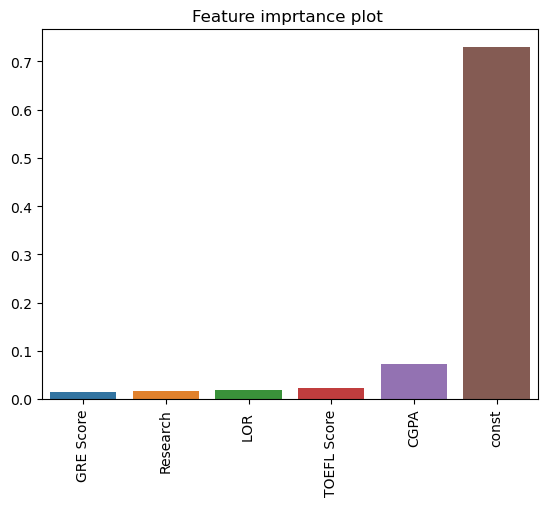

In [708]:
feature_imp = pd.DataFrame(results.params)
feature_imp[0]=feature_imp[0].apply(lambda x : abs(x))
feature_imp =feature_imp.sort_values(by =0)
sns.barplot(x=feature_imp.index , y=feature_imp[0].values)
plt.xticks(rotation=90)
plt.title("Feature imprtance plot ")
plt.show()

 train residual mean :0.0036502088728216408


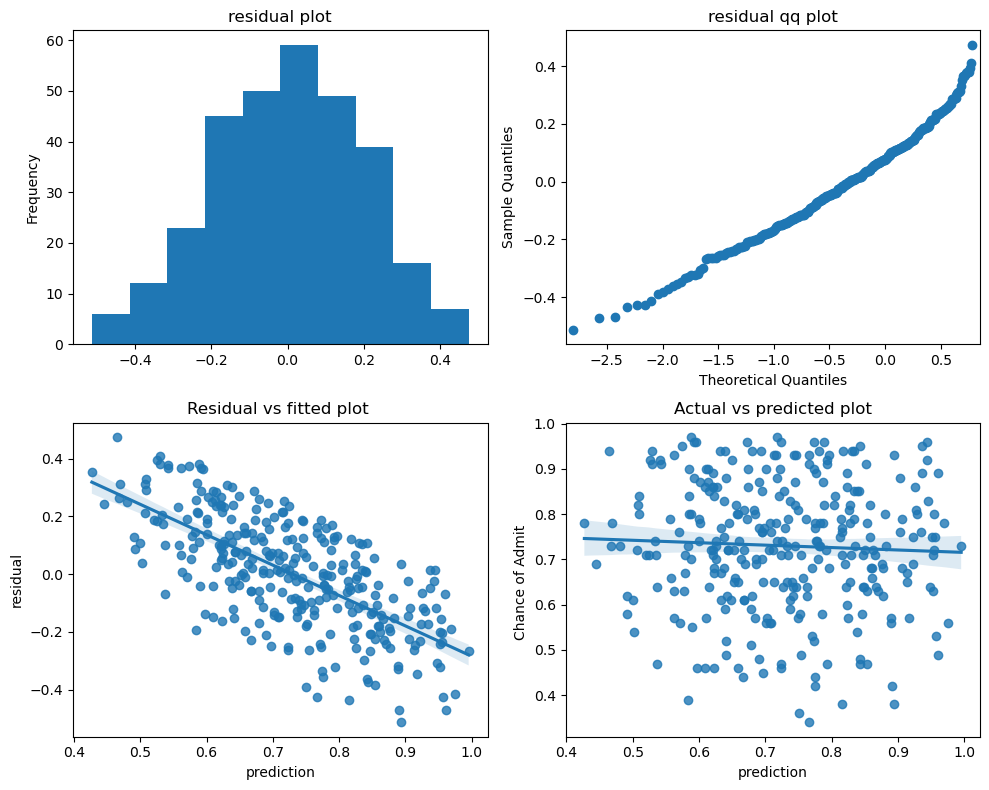

In [709]:
plot_diagnostic(y_train) 

1. residual looks normally distributed and homoskedestic 

Model 1  -- 
    - train mse: 0.003  
    - rmse: 0.058  
    - r2: 0.824  
    - adjr2: 0.820
    
    - test mse: 0.004  
    - rmse: 0.065  
    - r2: 0.782    
    - adjr2: 0.765

Model 2 -- with feature engineering 
    - train mse: 0.003  
    - rmse: 0.058  
    - r2: 0.824  
    - adjr2: 0.815
    
    - test mse: 26.545  
    - rmse: 5.152  
    - r2: -1386.087    
    - adjr2: -1680.843

Model 3 -- dropping fe and sop and Ur
    - train mse: 0.003  
    - rmse: 0.058  
    - r2: 0.822  
    - adjr2: 0.820
    
    - test mse: 0.004  
    - rmse: 0.064  
    - r2: 0.783    
    - adjr2: 0.771

Model 4 -- lasso 
    - train mse: 0.003  
    - rmse: 0.058  
    - r2: 0.822  
    - adjr2: 0.820
    
    - test mse: 0.004  
    - rmse: 0.064  
    - r2: 0.783    
    - adjr2: 0.771


Insight/ recommendation

- Most important features are:
  - CGPA
  - TOEFL
  - LOR

- If CGPA and TOEFL scores are high, and the LOR is written very well, the chance of getting into a good college is very high.

- The target feature may have some seasonal components. To improve the model, we may need additional information such as timestamp, country of the student, country of the college, number of seats in the college, IQ, gender, economic background of the student, etc.

- Adding engineered features did not improve the model performance; instead, it made test predictions worse.

- Adding some non-linear transformations may help improve model performance; testing is required.

- Model 3/4 can be considered the best model for predicting the chance of admission with test r2 score of 79%.